# Analise abaixo dois trechos do documento de requisitos de um novo sistema inteligente de monitoramento de edificios:
# Requisito Funcional:
Um novo emprendimento imobiliário esta com intenção de desenvolver um sistema inteligente de monitoramento de elevadores. Voce foi incumbido de projetar uma solução
computacional que gerencia
controle de movimentação dos vários elevadores do edificio. Os elevadores são convencionais, podendo subir, descer e parar nos andares
solicitados.
A inteligência do sistema está no fato de que o edificio deve monitorar o funcionamento dos elevadores para proporcionar mais segurança e também uma experiência de uso
mais agradável para os moradores. As ações que o sistema pode tomar variam desde ações de segurança até mesmo a ações de entreterimento, como reprodução de músicas
dentro do elevador:
# Exemplos:
Se um determinado elevador emperrar durante seu funcionamento, o sistema deve perceber e automaticamente invocar a equipe de manutenção e segurança. Enquanto isso
uma música agradável pode começar a ser reproduzida naquele elevador específico para acalmar o usuário.
Se um determinado elevador estiver em manutenção, o sistema pode, entre outras ações, interferir na velocidade de deslocamento dos outros elevadores.
# Requisitos Não-Funcionais:
- O código cliente que manipula os elevadores deve ser o mais inconsciente possivel dos objetos concretos existentes
- Nesta primeira versão do sistema, um elevador nunca estará em dois estados ao mesmo tempo.
- Embora não haja limitação de memória na infraestrutura computacional usada, deve-se prezar para que não haja criação desnecessária de objetos em memória.



# UML PRODUZIDO

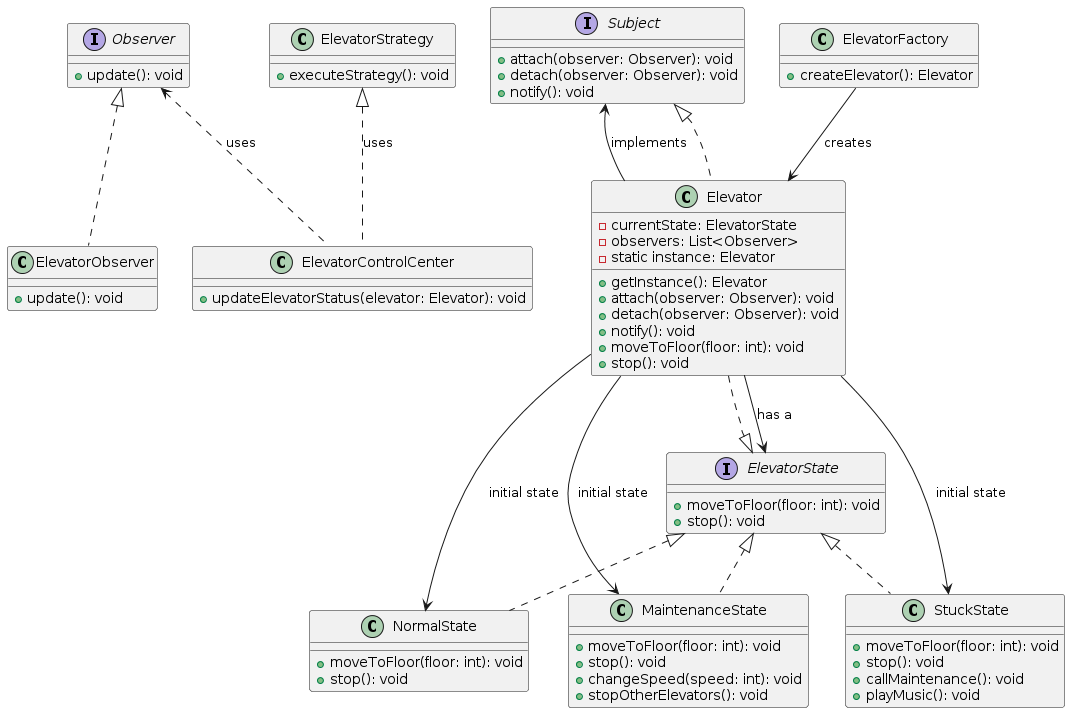

# Neste diagrama UML combinado usa:

* Singleton
* Strategy
* State
* Observer
* Factory

Utilizando o padrão State para representar os diferentes estados do elevador (Normal, Emperrado, Manutenção).
Então, introduzimos o padrão Observer para permitir que o Elevator (Elevador) notifique seus observadores sobre mudanças de estado.
Utilizamos o padrão Singleton para garantir que apenas uma instância do Elevator (Elevador) exista em todo o sistema.
Introduzimos o padrão Strategy para encapsular diferentes estratégias de controle de elevadores no ElevatorStrategy.
Utilizamos o padrão Factory para criar instâncias do Elevator (Elevador) de maneira flexível.
Embora seja uma simplificação, esse diagrama UML combinado mostra como esses padrões podem ser integrados em um sistema de monitoramento de elevadores.

In [6]:
from typing import List


# Interfaces

In [7]:
class ElevatorState:
    # Define a interface para os estados do elevador
    def moveToFloor(self, floor: int) -> None:
        pass

    def stop(self) -> None:
        pass

In [3]:
class Subject:
    # Define a interface para o sujeito observável
    def attach(self, observer: 'Observer') -> None:
        pass

    def detach(self, observer: 'Observer') -> None:
        pass

    def notify(self) -> None:
        pass

In [4]:
class Observer:
    # Define a interface para o observador do sujeito
    def update(self) -> None:
        pass


# Classes

In [8]:
class NormalState(ElevatorState):
    # Implementa o estado normal do elevador
    def moveToFloor(self, floor: int) -> None:
        print(f"Elevator is moving to floor {floor}")

    def stop(self) -> None:
        print("Elevator stopped")


In [9]:
class StuckState(ElevatorState):
    # Implementa o estado de travamento do elevador
    def moveToFloor(self, floor: int) -> None:
        print("Elevator is stuck and cannot move")

    def stop(self) -> None:
        print("Elevator stopped due to being stuck")

    def callMaintenance(self) -> None:
        print("Maintenance called")

    def playMusic(self) -> None:
        print("Playing music to soothe passengers")

In [10]:
class MaintenanceState(ElevatorState):
    # Implementa o estado de manutenção do elevador
    def moveToFloor(self, floor: int) -> None:
        print("Elevator is in maintenance mode and cannot move")

    def stop(self) -> None:
        print("Elevator stopped due to maintenance")

    def changeSpeed(self, speed: int) -> None:
        print(f"Elevator speed changed to {speed} floors per minute")

    def stopOtherElevators(self) -> None:
        print("Other elevators stopped for maintenance")


In [16]:
class Elevator(Subject, ElevatorState):
    # Implementa a classe do elevador, que também é um sujeito observável
    _instance = None

    @staticmethod
    def getInstance():
        # Implementa o padrão Singleton para garantir que apenas uma instância do elevador seja criada
        if Elevator._instance is None:
            Elevator._instance = Elevator()
        return Elevator._instance

    def __init__(self):
        self._currentState = NormalState()  # Define o estado inicial como Normal
        self._observers = []  # Lista de observadores

    def attach(self, observer: Observer) -> None:
        # Anexa um observador ao elevador
        self._observers.append(observer)

    def detach(self, observer: Observer) -> None:
        # Remove um observador do elevador
        self._observers.remove(observer)

    def notify(self) -> None:
        # Notifica todos os observadores quando ocorre uma mudança de estado
        for observer in self._observers:
            observer.update()

    def moveToFloor(self, floor: int) -> None:
        # Movimenta o elevador para um determinado andar
        self._currentState.moveToFloor(floor)
        self.notify()  # Notifica os observadores após mover o elevador

    def stop(self) -> None:
        # Para o elevador
        self._currentState.stop()
        self.notify()  # Notifica os observadores após parar o elevador


In [12]:
class ElevatorObserver(Observer):
    # Implementa um observador para o elevador
    def update(self) -> None:
        print("Elevator status updated")

In [13]:
class ElevatorControlCenter:
    # Implementa o centro de controle do elevador
    def updateElevatorStatus(self, elevator: Elevator) -> None:
        print("Elevator status updated in control center")

In [14]:
class ElevatorStrategy:
    # Implementa uma estratégia para o elevador (não implementada neste exemplo)
    def executeStrategy(self) -> None:
        print("Executing elevator strategy")

In [15]:
class ElevatorFactory:
    # Implementa uma fábrica para criar instâncias do elevador
    def createElevator(self) -> Elevator:
        return Elevator.getInstance()

In [17]:
if __name__ == "__main__":
    # Criando o elevador e observador
    elevator = Elevator.getInstance()
    observer = ElevatorObserver()

    # Anexando observador ao elevador
    elevator.attach(observer)

    # Movendo o elevador para o 5º andar
    elevator.moveToFloor(5)

    # Parando o elevador
    elevator.stop()


Elevator is moving to floor 5
Elevator status updated
Elevator stopped
Elevator status updated
